<a href="https://colab.research.google.com/github/gisynw/geog386/blob/main/docs/Lectures/Student_Week04_Pandas.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" style="height: 30px;"/>
</a>

<a href="./Student_Week04_Pandas.ipynb" target="_blank"> 
  <img src="https://img.icons8.com/?size=100&id=108635&format=png&color=000000" alt="Download" style="height: 40px;"/>
 </a>

<center><h2 style="color:  #526cfe; font-family: Arial, sans-serif; font-size: 32px; padding: 10px;"> Week 4: Pandas</h2></center>

### What is pandas?

pandas is a Python library used for data manipulation and analysis that buil on top of the Python programming language.

Pandas work well with CSV file (e.g., excel, SQL)

### Key features of Python Pandas

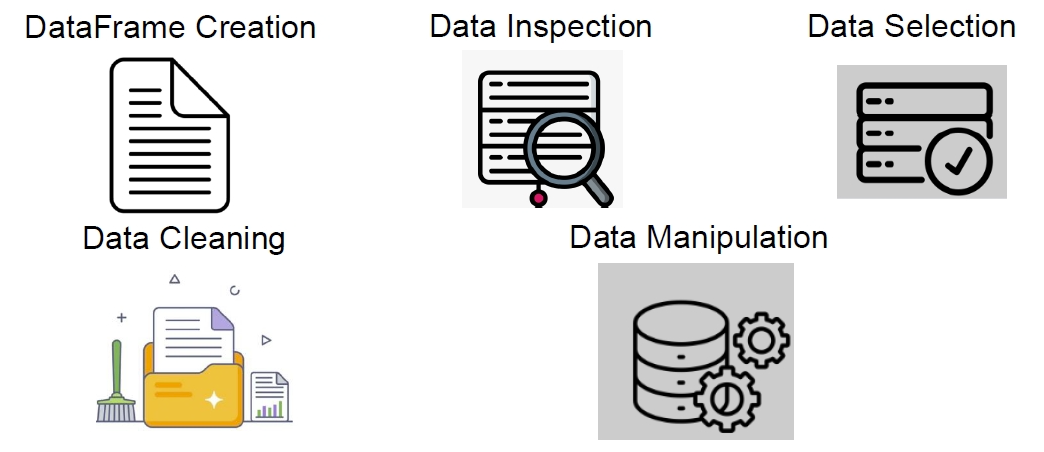

### Import Pandas in Python
It is recommended to install and run pandas from a virtual environment

#### Create a virtual environment
Right click the Anaconda prompt and __Run as Administrator__ (This step will ensure that your package is installed in _Anaconda/env_ folder) 

Create a virtual environment named as 'pandas_v' with python version 3.9
```bash
conda create -n pda python=3.9
```

#### List virtual environment
now if you list virgual envionment, you can see the virtual environment that you just create 
```bash
conda env list
```

#### Activate virtual environment
if you virtual environment named as 'arcgis_python'
```bash
activate pda
```

#### Install pandas
```bash
conda install pandas
```

### Download data in CSV format

[Data Source: The city of Worcester](https://opendata.worcesterma.gov/search?collection=dataset&sort=Date%20Updated%7Cmodified%7Cdesc)

Search: Worcester Police Use of Force Incidents (July 2024)

Download CSV

### Loading a Pandas DataFrame from CSV file

In [ ]:
import os

In [ ]:
os.getcwd()

In [ ]:
import pandas as pd

In [ ]:
## use the dir() function to list all the attributes (include functions) in python
print(dir(pd))

#### read csv

In [ ]:
incidents = pd.read_csv(r'Worcester_Police_Use_of_Force_Incidents_July_2024.csv')
incidents.tail(n=5)

#### A concise summary of a DataFrame

In [ ]:
incidents.info()

In [ ]:
incidents.shape

#### Series and DataFrame

Series: A one-dimensional labeled array capable of holding data of any type (integers, strings, floating-point numbers, etc.).

DataFrame: A two-dimensional tabular data structure with labeled axes (rows and columns).

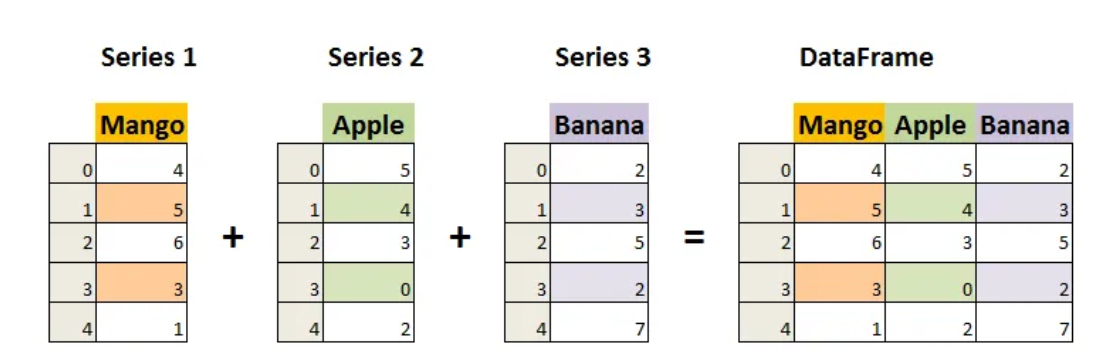

#### Access a column

In [ ]:
# Access a column as series
col_series = incidents['Narr']
print(col_series)
type(col_series)

In [ ]:
# Access a column as Series (2nd syntax)
col_series02 = incidents.Narr
print(type(col_series02))
col_series02

In [ ]:
## Access a column as DataFrame
col_df = incidents[['Narr']]
print(col_df)
type(col_df)

#### Access a row
The iloc() function is an indexed-based selecting method which means that we have to pass an integer index in the method to select a specific row/column.

In [ ]:
# Access a row as Series
row_series = incidents.iloc[0,:] 
print(row_series)
type(row_series)

In [ ]:
# Access a row as DataFrame
row_df = incidents.iloc[[0],:] 
print(type(row_df))
row_df

### Access multiple rows and columns

In [ ]:
##### Access multiple row using iloc()
sub_inci = incidents.iloc[0:5,0:3]
print(type(sub_inci))
sub_inci

#### Access columns or rows using loc()
The loc() function is label based data selecting method which means that we have to pass the name of the row or column which we want to select.

In [ ]:
rst = incidents.loc[0:1,['Incident_No', 'Date___Time', 'Location']]
rst

### Exercise 1: Get record as series and Datafram from incidents
1. Get the record as series: 'Location' column

2. Get the record as DataFrame using index based method (.iloc): row 1 : 5 and column 2 : 3

3. Get the record as DataFrame using label based method (.loc): row 1:5 and column ['Supervisor', 'Notified']

In [ ]:
incidents.loc[1:6,['Supervisor', 'Notified']]

In [ ]:
incidents.iloc[1:5,2:3]

In [ ]:
incidents.Location

### Data cleaning
#### Rename the column name
Check the columns names based on `incidents.columns`

In [ ]:
incidents.columns

In [ ]:
# #format of columns can be the dictionary: old column name: new column name
# print('column name are {} '.format(incidents.columns))

# incidents.rename(columns={'Date___Time':'DateTime', 'Incident_No':"IncidentNo"}, inplace=True)

# print('updated column name are {} '.format(incidents.columns))

In [ ]:
#format of columns can be the dictionary: old column name: new column name
print('column name are {} '.format(incidents.columns))

incidents.rename(columns={'Date___Time':'DateTime', 'Incident_No':"IncidentNo"}, inplace=True)

print('updated column name are {} '.format(incidents.columns))

#### Check Null value
[pandas.DataFrame.isnull](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) check missing value

[pandas.DataFrame.sum](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) the sum of the values over the requested axis.

In [ ]:
# check null value in each cell
incidents.isnull().head(n = 5)

In [ ]:
# calcualte the sum for each column
incidents.isnull().sum()

#### Get unique value of the columns
unique() function in pandas
 
[pandas.unique](https://pandas.pydata.org/docs/reference/api/pandas.unique.html)

In [ ]:
multi_col = incidents.loc[:,['Injury', 'Narr']]
print(type(multi_col))
pd.unique(multi_col)

### Exericse 2: Loop throug the columns in incidents to calculate the unique value 

In [ ]:
for col_names in multi_col.columns:
    print(col_names)

In [ ]:
multi_col['Injury']

In [ ]:
# use the column to get the series from dataframe
# calculate the unique vale for each series
for col_names in multi_col.columns:
    print(pd.unique(multi_col[col_names]))


### DataFrame Manipulation
#### Data sorting
[pandas.DataFrame.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)

[pandas.Series.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_values.html#pandas.Series.sort_values)

In [ ]:
inct_sort_narr = incidents.sort_values(by="Narr", ascending=False)
inct_sort_narr.head(n = 6)

### Exercise 2: sort values based on Officer (String)
sort_values() function sort the number from smallest to largest (ascending) descending

how about sort the String?

#### Data query: single condition

In [ ]:
unique_injury = incidents.loc[:,"Injury"].unique()
print('unique value: {}'.format(unique_injury))

In [ ]:
none_incident = incidents.query('Injury == "_None"')
print(none_incident.head(n=5))
print(none_incident.shape)

### Exercise 3: How many incidents' injury type are 'Visible Injury'

In [ ]:
none_incident = incidents.query('Injury == "_None"')
print(none_incident.head(n=5))
print(none_incident.shape)

In [ ]:
none_incident = incidents.query('Injury == "Visible Injury"')
print(none_incident.head(n=5))
print(none_incident.shape)

#### Data query: multiple condition
Query how many incidents's Narr are larger than 6 and Implement are 'I. Display of Firearm'

In [ ]:
none_firearm = incidents.query('Narr > 6 & Implement == "I. Display of Firearm"')
print(none_firearm.head(n=5))
none_firearm.shape

### DateTime
Pandas provides the `pd.to_datetime()` function to convert string data into a datetime object:

In [ ]:
incidents['DateTime']

Documentation about [strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)

In [ ]:
# create a new column to store the DateTime
incidents['DT'] = pd.to_datetime(incidents['DateTime'], format = "%m/%d/%y %I:%M %p")

In [ ]:
incidents['DT']

In [ ]:
# sort value based on 'DateTime' or 'DT' to see the difference
incidents.sort_values(by='DT', ascending=True).head(n=5)

In [ ]:
incidents.info()

### Get weekday from the DateTime
[pandas.Series.dt](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html)

In [ ]:
incidents['wday'] = incidents.DT.dt.weekday

In [ ]:
incidents['wday'].unique()

### Exercise 4: Get year and hour from the DateTime and assign to a new column

incidents['yr']

incidents[hr]

In [ ]:
incidents['year'] = incidents.DT.dt.year
incidents['hr'] = incidents.DT.dt.hour

In [ ]:
incidents['year']

### Aggregating statistics

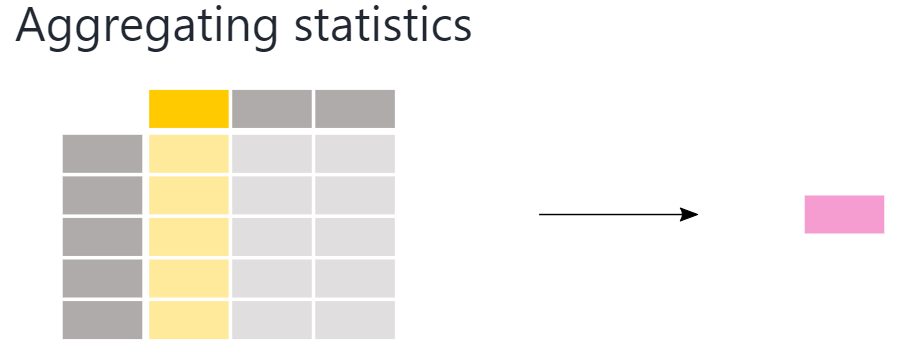

#### Aggregating Statistics of a single column

[pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [ ]:
incidents['Narr'].mean()

In [ ]:
incidents[["Narr"]].describe()

#### Aggregating statistics grouped by category
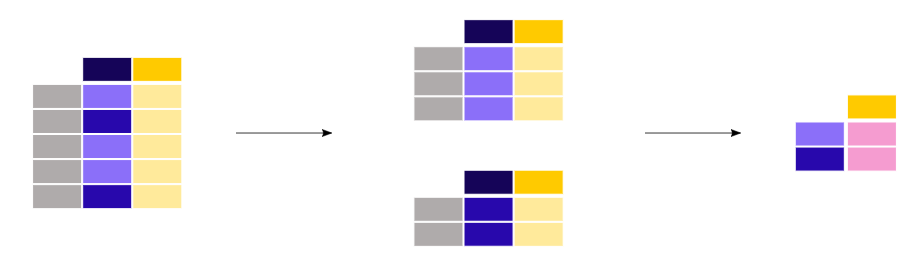

In [ ]:
incidents[["Narr", "wday"]].groupby("wday").mean()

### Exercise 5: Count the incidents based on day of week
using count() to count the incidents for each day of week

Group IncidentNo based on wday, then count the occurrence of incidentNo for each wday

Sort the wday based on the total number of incidents

In [ ]:
incidents.groupby('wday')['IncidentNo'].count()

In [ ]:
incidents[["Narr", "wday"]].groupby("wday").count()

In [ ]:
incidents[["Narr", "wday"]].groupby("wday").count()

### Spatially Enabled Data Frame
The Spatially Enabled DataFrame (SEDF) creates a simple, intutive object that can easily manipulate attribute and geometric data.

Create SEDF from a Shapefile

An SEDF still includes access to all the Pandas DataFrame functionality

#### Shapefile

A shapefile is made up of multiple files and all files must be found in the same folder with the same name

A shapefile must have the following:

- .shp – this file stores the geometry of the feature
- .shx – this file stores the index of the geometry
- .dbf – this file stores the attribute information for the feature